Kmeans clustering

In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt

    # Provided dataset
    data_points = np.array([
        [2, 10],
        [2, 5],
        [8, 4],
        [5, 8],
        [7, 5],
        [6, 4],
        [1, 2],
        [4, 9]
    ])

In [ ]:
    # Specify initial centroids
    initial_centroids = np.array([
        [2, 10],
        [5, 8],
        [1, 2]
    ])

    # Number of clusters
    num_clusters = initial_centroids.shape[0]

    def assign_to_clusters(data, centroids):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        return clusters
    def update_centroids(data, clusters, k):
        centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        return centroids

    def kmeans(data, initial_centroids, max_iters=100):
        centroids = initial_centroids

        for _ in range(max_iters):
            clusters = assign_to_clusters(data, centroids)
            new_centroids = update_centroids(data, clusters, num_clusters)

            # Check for convergence
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        return clusters, centroids

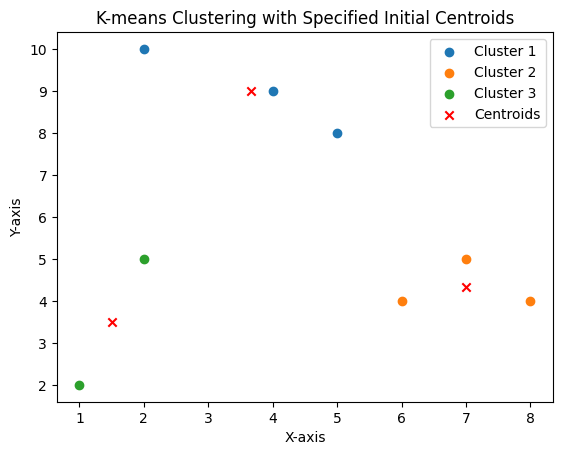

In [ ]:
    # Run K-means algorithm with specified initial centroids
    final_clusters, final_centroids = kmeans(data_points, initial_centroids)

    # Plot the results
    for i in range(num_clusters):
        cluster_points = data_points[final_clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

    plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='x', color='red', label='Centroids')
    plt.title('K-means Clustering with Specified Initial Centroids')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
